# CCR Spent Catalyst Project Grayscale Model

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Loading data
data = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\Grayscale_CCR\gr_train.xlsx') # Provide data location here
data_test = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\Grayscale_CCR\gr_test.xlsx')

Exploring data

In [28]:
data.head()

,Unnamed: 0,Grayscale,files,Output
0,0,58.667831,1,4.72
1,89,59.035758,2,5.00
2,100,52.620833,3,4.00
3,111,50.721490,4,4.10
4,122,44.300608,5,4.90


In [29]:
data.drop(['Unnamed: 0', 'files'],axis=1, inplace=True)

In [30]:
len(data)

177

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Grayscale,177.0,60.063906,10.013132,36.412296,55.128642,61.189826,65.518972,83.326976
Output,177.0,5.800847,1.166355,3.460000,4.960000,5.700000,6.480000,8.400000


Checking distribution

C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_27020\2505215319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins = 10)


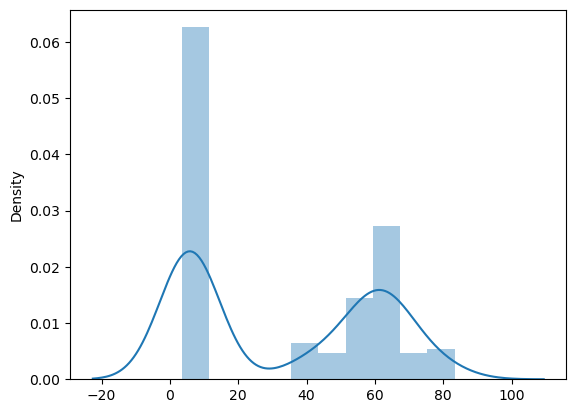

In [32]:
sns.distplot(data, bins = 10)
plt.show()

Plotting Correlation plot

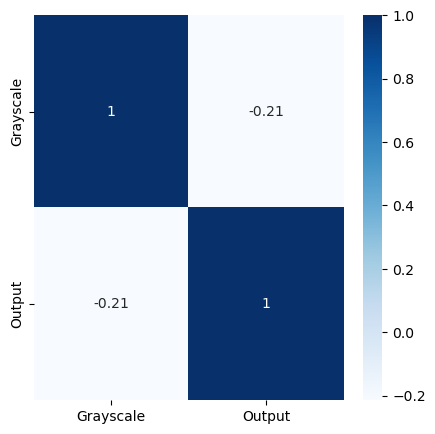

In [33]:

corrmat = data.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corrmat, annot = True, cmap = 'Blues')
plt.show()

In [34]:
data_test.head()

,Unnamed: 0,Grayscale,files,Output
0,0,65.412089,1,5.50
1,11,45.658448,2,5.50
2,22,74.141592,3,4.90
3,33,63.152197,4,6.20
4,44,81.108982,5,6.24


In [35]:
data_test.drop(['Unnamed: 0', 'files'], axis = 1, inplace=True)

In [36]:
data.head()

,Grayscale,Output
0,58.667831,4.72
1,59.035758,5.00
2,52.620833,4.00
3,50.721490,4.10
4,44.300608,4.90


In [37]:
data_test.head()

,Grayscale,Output
0,65.412089,5.50
1,45.658448,5.50
2,74.141592,4.90
3,63.152197,6.20
4,81.108982,6.24


### Using Simple Linear Regression Model

In [38]:
model_lr = LinearRegression() # Linear Regression model
scaler = StandardScaler() # Standard scalar
normalizer = MinMaxScaler()

#Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
# Normalization or Min-Max Scaling:
# Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as: X_new = (X - X_min)/(X_max - X_min)
# This scales the range to [0, 1] or sometimes [-1, 1]. 
# Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.
# Normalization is useful when there are no outliers as it cannot cope up with them. 
# Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.


# Standardization or Z-Score Normalization:
# Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
# X_new = (X - mean)/Std

# Standardization can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. 
# Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. 
# We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

# Standardization does not get affected by outliers because there is no predefined range of transformed features.


#Difference between Normalization and Standardization

# Sr.NO.	# Normalization	                                                                       # Standardization
# 1.	# Minimum and maximum value of features are used                                           # for scaling Mean and standard deviation is used for scaling.
# 2.	# It is used when features are of different scales.  	                               # It is used when we want to ensure zero mean and unit standard deviation.
# 3.	# Scales values between [0, 1] or [-1, 1].	                                         # It is not bounded to a certain range.
# 4.	# It is really affected by outliers.	                                                   # It is much less affected by outliers.
# 5.	# Scikit-Learn provides a transformer called MinMaxScaler for Normalization.	           # Scikit-Learn provides a transformer called StandardScaler for standardization.
# 6.	# This transformation squishes the n-dimensional data into an n-dimensional unit hypercube.# It translates the data to the mean vector of original data to the origin and squishes or expands.
# 7.	# It is useful when we don’t know about the distribution	                               # It is useful when the feature distribution is Normal or Gaussian.
# 8.	# It is a often called as Scaling Normalization	                                         # It is a often called as Z-Score Normalization.

In [49]:
# Creatig dependent and independent variables
X = data.drop(['Output'], axis = 1)
y = data['Output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

# Standardizing Data
#X_train = scaler.fit_transform(X_train) 
#X_test = scaler.transform(X_test)

# Normalizing data
X_train = normalizer.fit_transform(X_train) 
X_test = normalizer.transform(X_test)

# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [50]:
# Predecting values on training dataset
pred_lr_tr = lr_reg.predict(X_test)
pred_lr_tr # Predicted values
# Predecting values on test_dataset
X_test_new = data_test.drop(['Output'], axis = 1)
X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
#X_test_new_scaled = normalizer.transform(X_test_new)
pred_lr_ts = lr_reg.predict(X_test_new_scaled) # Predecting output values
y_actual = data_test['Output']



In [51]:
len(X_train), len(y_train)

(159, 159)

In [52]:
# R2_score on training dataset
r2score_lr_ts = r2_score( y_actual, pred_lr_ts)
# R2_score on training dataset
r2score_lr_tr = r2_score(y_test, pred_lr_tr)
print('R2 Score of training dataset:', r2score_lr_tr, '\n', 'R2 Score of testing dataset:' , r2score_lr_ts )

R2 Score of training dataset: 0.052664082317921634 
 R2 Score of testing dataset: -4.202824116870662


In [53]:
# Calculating Root mean square error on training dataset
mse_tr = mean_squared_error(y_test, pred_lr_tr)
rmse_tr =np.sqrt(mse_tr)
# Calculating Root mean square error on test dataset
mse_ts = mean_squared_error(pred_lr_ts, y_actual)
rmse_ts =np.sqrt(mse_ts)
print('Test RMSE:', rmse_ts, '\n' , 'Training RMSE:', rmse_tr)


Test RMSE: 1.8469288753703101 
 Training RMSE: 1.1414497956729313


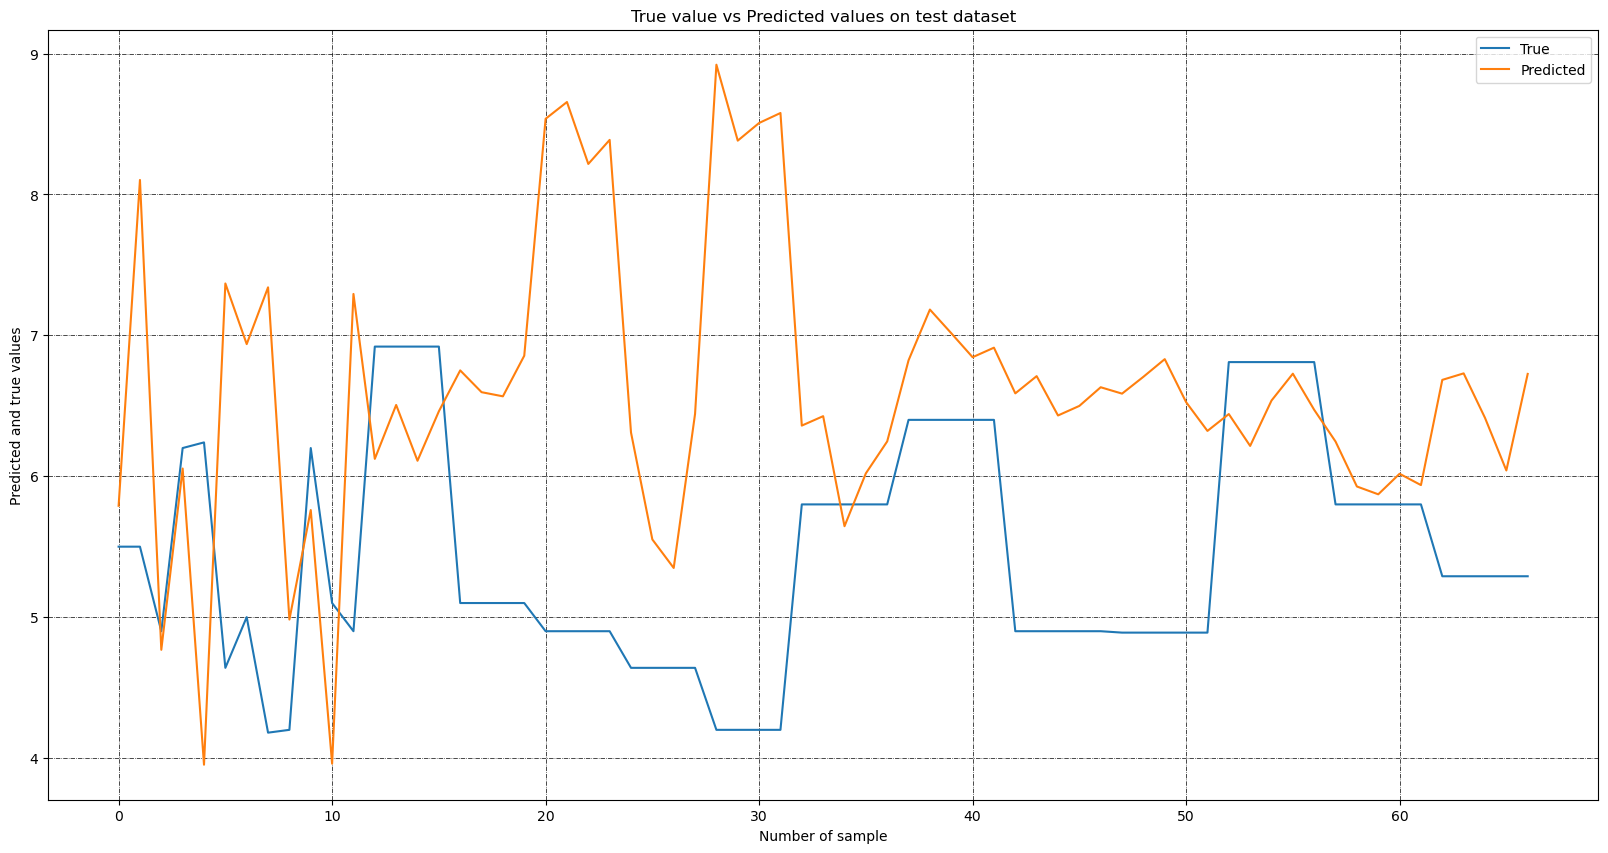

In [54]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.plot(y_actual)
plt.plot(pred_lr_ts)
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
plt.show()




### Using Random Forest

In [55]:
model_rf = RandomForestRegressor() # Random Forest Regressor Model
rf_reg = model_rf.fit(X_train, y_train) # Training Model
pred_rf_val = rf_reg.predict(X_test) # Predecting Output
pred_rf_test = rf_reg.predict(X_test_new_scaled) # Predecting Output


In [56]:
# Calculating Root mean square error
mse_tr = mean_squared_error(y_test, pred_rf_val)
rmse_tr =np.sqrt(mse_tr)

# Calculating Root mean square error
mse_ts = mean_squared_error(y_actual, pred_rf_test)
rmse_ts =np.sqrt(mse_ts)
print('Test RMSE:', rmse_ts, '\n' , 'Training RMSE:', rmse_tr)


Test RMSE: 1.015217019590231 
 Training RMSE: 1.2620366518273396


In [57]:
# R2_score on training dataset
r2score_lr_tr = r2_score( y_test, pred_rf_val)

# R2_score on test dataset
r2score_lr_ts = r2_score( y_actual, pred_rf_test)

print('R2 Score of training dataset:', r2score_lr_tr, '\n', 'R2 Score of testing dataset:' , r2score_lr_ts )

R2 Score of training dataset: -0.15806866282309828 
 R2 Score of testing dataset: -0.5720146244968636


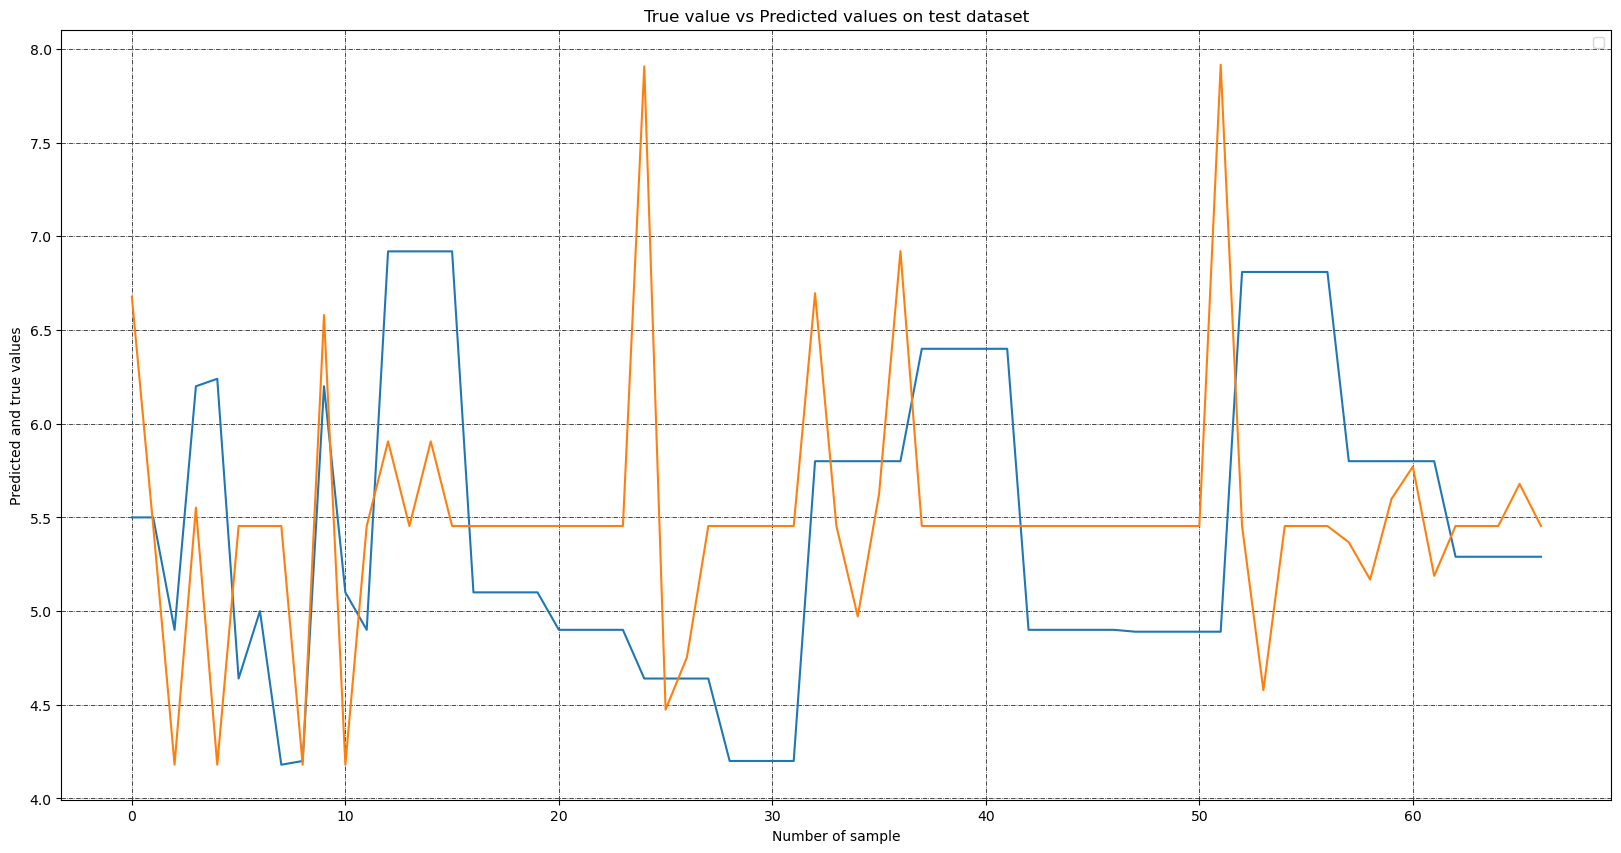

In [58]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)

plt.plot(y_actual)
plt.plot(pred_rf_test)
plt.show()